In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('House Price India.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

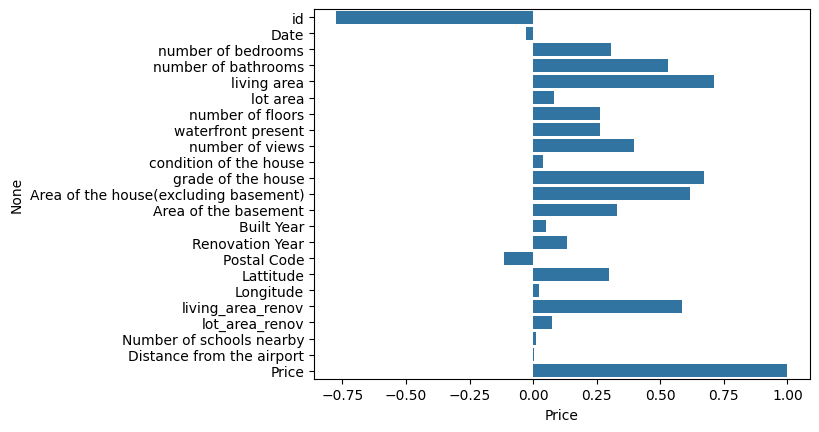

In [13]:
df_corr = df.corr()['Price']

#plt.figure(figsize=(20,6))
sns.barplot(x=df_corr, y=df_corr.index)
plt.show()

In [14]:
features = df_corr[df_corr > 0.01].drop('Price').index
list(features)

['number of bedrooms',
 'number of bathrooms',
 'living area',
 'lot area',
 'number of floors',
 'waterfront present',
 'number of views',
 'condition of the house',
 'grade of the house',
 'Area of the house(excluding basement)',
 'Area of the basement',
 'Built Year',
 'Renovation Year',
 'Lattitude',
 'Longitude',
 'living_area_renov',
 'lot_area_renov']

In [15]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

In [16]:
X = df[features]
y = df['Price']

X.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,52.8878,-114.470,2470,4000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,52.8852,-114.468,2940,6600
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,52.9532,-114.321,3350,42847
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,52.9047,-114.485,2060,4500
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,52.9133,-114.590,2380,4750


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

X_train.shape, X_test.shape

((11695, 17), (2924, 17))

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'r2 score : {model.score(X_test, y_test)}')
print(f'MAE score : {mean_absolute_error(y_test, preds)}')
print(f'MSE score : {mean_squared_error(y_test, preds)}')
print(f'CV score : {cross_val_score(model, X, y, cv=5).mean()}')


r2 score : 0.7037836266097147
MAE score : 121192.97341062073
MSE score : 33990202651.978134
CV score : 0.6995490433386562
